In [1]:
# Test Cell
# When the notebook is executed by the Build process, this cell is ignored. 
# See the `Test Cell` section below for further details.
additional_parameters = '''{}'''

##### Example of how to import init_sisense in order to query data from sisense
In case you need to query data from sisense paste the code below in the test cell
> from init_sisense import sisense_conn  
> cube_name = "Sample ECommerce"

# Getting Started

This is a Custom Code Notebook Template.  
It includes the basic flow that is required in a Custom Code Notebook. See Content below.

---

#### Jupyter Notebooks
If you are not familiar with Jupyter Notebooks, we suggest reading about it [here](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/What%20is%20the%20Jupyter%20Notebook.html).

Get to know the Basics of Jupyter Notebooks, including how to add a New Notebook manually to the Jupyter Server [here](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Notebook%20Basics.html).

---

## Content
  
1. [Test Cell](#Test-Cell)
1. [Imports](#Imports)
1. [Additional Parameters](#Additional-Parameters)
1. [Data](#Data)  
1. [Transformation](#Transofrmation)
1. [Output Table](#Output-Table)


# Test Cell

The First notebook cell is a Test Cell. 

### What is a Test Cell ?
The additional parameters in the Test Cell are sample values. Its purpose is to mimic the additional parameters passed to the notebook from the Sisense Data Model build process. By having this test cell, the notebook can be run independently of the build process for debugging or editing purposes.
When the notebook is executed from the Sisense build process, the test cell is skipped and the additional parameters are passed to the notebook downstream as a JSON string.  
You can change the Test cell location by changing its value in the notebook manifest. The default value is always the first notebook cell (cell 0).

> "cellsDisable": [0]

### Test Cell Components
1. **additional_parameters**  
JSON string structure that contains parameters that the user defines in the manifest file.
2. In case of importing data from Sisense you will need the following:  
    1. **init_sisense**   
Import a Sisense connection from **init_sisense** to connect to Sisense APIs.           
    1. **cube_name**  
Cube name needs to be initialized in order to query from the cube.

### Setting up your Test Cell in a new notebook 
You can easily obtain sample values of **additional parameters** for the Test cell with your own data in two ways:   

(1) After filling out sample values for your notebook configuration in the **Notebook Library > Notebook Parameters Page**, you can simply press the **Copy Generated Data** button and paste the value in the respective notebook Test Cell.  
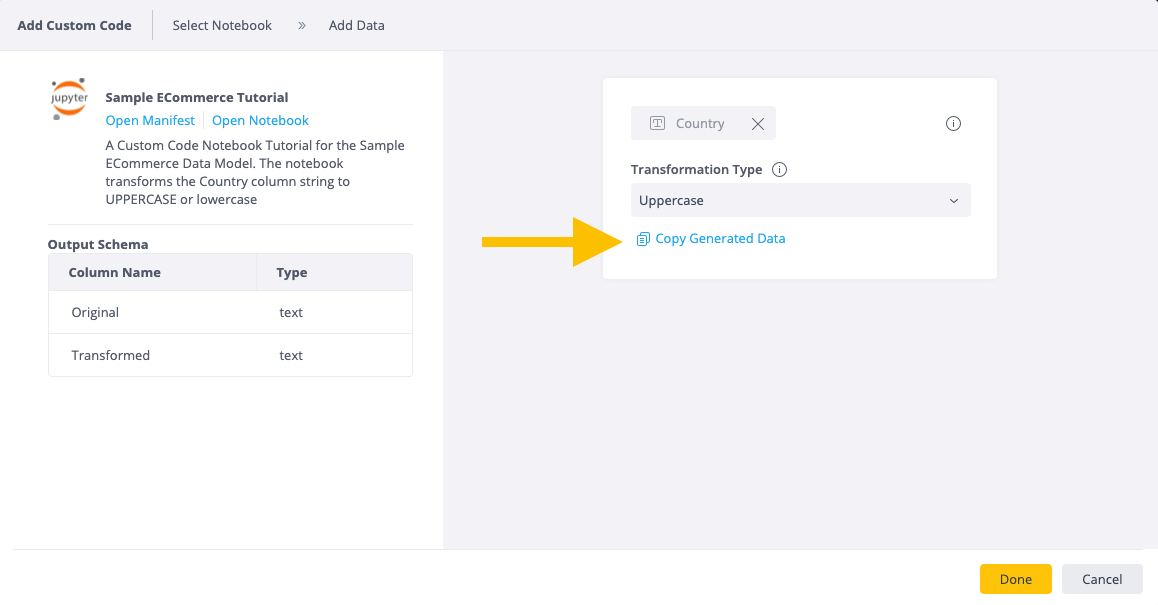

(2) Alternatively, you can call the following SisenseAPI method in the Test Cell to load the current configuration values from the **cube_name** model:
> additional_parameters = sisense_conn.load_additional_parameters(cube_name=cube_name)

# Imports


In [2]:
import json
import pandas as pd

raise customcode errors, for better error handling  
> import customcode_errors as err

#### About Imports
Many common Python packages are already installed. If you have an additional Package that is not pre-installed you can simply install it with **pip** from an empty notebook cell.

> ! pip install MY-PACKAGE

# Additional Parameters

Load the additional parameters passed from the build process or those initialized in the Test Cell above.

In [3]:
add_param = json.loads(additional_parameters)

# Data

Import data from Sisense / Generate Data / Import from another source

If you are querying data from the Sisense ElastiCube:
1. Make sure you initialized a Sisense connection from the Test Cell
2. Execute the SQL Statement

##### Example of how to import data from Sisense and define the SQL Statement
> logical_sql = (f'SELECT T.[Country]\n'  
               f'FROM [Country] as T')  
print("SQL Statement:\n" + logical_sql)

##### Example of how to Execute the SQL Statement
> logical_sql_res = sisense_conn.get_logical_sql(query=logical_sql,   
                                                cube_name=cube_name,  # passed to notebook from build / Test Cell  
                                                 count=None)  # limit the rows fetched  

##### Example of how to check for errors in logical sql execution 
> if "error" in logical_sql_res:  
    raise err.CustomCodeException(*err.ERROR_IN_LOGICAL_SQL, description=logical_sql_res.get("details"))  

##### Get Data
> sql_results = [x[0] for x in logical_sql_res["values"]]  
> print(f"Example value fetched from cube:\n{sql_results[0]}")  

--- 

In this template we are not importing/generating data.
Get your data in the code cell below

# Transformation
    
In the transformation step you can manipulate your data as you see fit.

Enter your own Transformation in the cell below:

In [4]:
# Output table must be a pandas dataframe named df_result
df_result = pd.DataFrame()

##### Example Transformation  
> df_result = pd.DataFrame(sql_results, columns=["Original"])  
>   
> #transform the original column - ALL CAPS the text  
> df_result["ALLCAPS"] = df_result["Original"].map(lambda x: x.upper())  

# Output Table
    
Manipulate the data, if needed, to fit the notebook manifest.

Overwrite the cell below with your own code if needed. In this case we are adding an empty column to match the notebook's manifest

In [5]:
df_result["example"] = ["example"]

In [ ]:
# Make sure the results are as expected (Optional)
df_result.head()

In [7]:
# monitor the df_result datatype (Optional)
df_result.dtypes

example    object
dtype: object

## Important Notice
1. Make sure the resulting dataframe is called: **df_result**
1. The Dataframe Columns and Datatypes have to be the same as configured in the respective manifest.

The default manifest has to include at least 1 column. Please change according to your wanted schema.  
For reference, these are the output column definitions from the [notebook manifest](./NOTEBOOK_NAME.json)
> "columns": [  
> {  
>   "type": 18,  // text  
>   "id": "example",  
>   "name": "example"  
> }
> ]  